<a href="https://colab.research.google.com/github/ajaysaikiran2208/OpenCV/blob/main/Color_Quantization_using_K_Means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Color quantization using K-means

Performs a pixel-wise Vector Quantization (VQ) of an image, reducing the number of colors required to show the image from 96,615 unique colors to 64, while preserving the overall appearance quality.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.datasets import load_sample_image
from sklearn.utils import shuffle
from time import time
import cv2

In [ ]:
n_colors = 64

In [ ]:
image_loaded= cv2.imread("/content/iStock-641093712-min-1.jpg")

In [ ]:
image_loaded=np.array(image_loaded,dtype=np.float64)/255.0

In [ ]:
w, h, d = original_shape = tuple(image_loaded.shape)

In [ ]:
assert d == 3
image_array = np.reshape(image_loaded, (w * h, d))

In [ ]:
print("Fitting model on a small sub-sample of the data")
t0 = time()
image_array_sample = shuffle(image_array, random_state=0)[:1000]
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
print("done in %0.3fs." % (time() - t0))

Fitting model on a small sub-sample of the data
done in 0.538s.


In [ ]:
# Get labels for all points
print("Predicting color indices on the full image (k-means)")
t0 = time()
labels = kmeans.predict(image_array)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (k-means)
done in 0.423s.


In [ ]:
codebook_random = shuffle(image_array, random_state=0)[:n_colors]
print("Predicting color indices on the full image (random)")
t0 = time()
labels_random = pairwise_distances_argmin(codebook_random,
                                          image_array,
                                          axis=0)
print("done in %0.3fs." % (time() - t0))

Predicting color indices on the full image (random)
done in 0.631s.


In [ ]:

def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    d = codebook.shape[1]
    image = np.zeros((w, h, d))
    label_idx = 0
    for i in range(w):
        for j in range(h):
            image[i][j] = codebook[labels[label_idx]]
            label_idx += 1
    return image

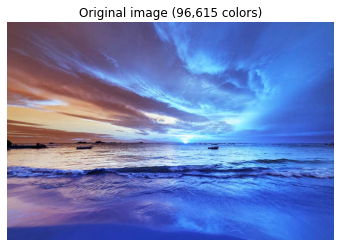

In [ ]:
# Display all results, alongside original image
plt.figure(1)
plt.clf()
plt.axis('off')
plt.title('Original image (96,615 colors)')
plt.imshow(image_loaded)

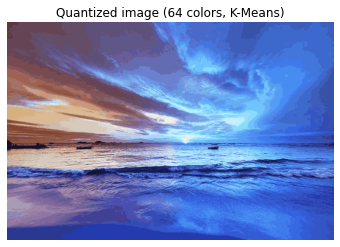

In [ ]:
plt.figure(2)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, K-Means)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

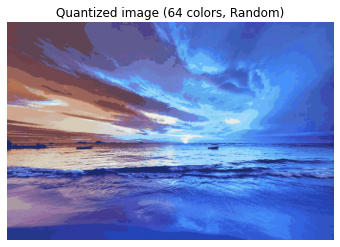

In [ ]:
plt.figure(3)
plt.clf()
plt.axis('off')
plt.title('Quantized image (64 colors, Random)')
plt.imshow(recreate_image(codebook_random, labels_random, w, h))
plt.show()